In [16]:
# | label: fig-plot
# | fig-cap: "Short explanation"

# Exploring Pixar Films

## Introduction

Pixar Animation Studios is an American computer animation studio known for revolutionizing the animation industry with its groundbreaking use of 3D computer graphics and heartfelt storytelling. Founded in 1986 when Steve Jobs purchased Lucasfilm’s Computer Graphics Division, Pixar began as a technology company before producing its first feature film, Toy Story (1995), the first entirely computer-animated movie ever released.

Since then, Pixar has produced a celebrated lineup of films, including Finding Nemo, The Incredibles, Inside Out, and Coco, blending cutting edge technology with emotionally resonant narratives. Pixar films are known for their critical acclaim, strong box office performance, and ability to appeal to both children and adults, often exploring universal themes like friendship, family, identity, and personal growth. Today, Pixar continues to be a major creative force within Walt Disney Studios.

Do films released later in the franchise (higher release order number) receive better or worse critical and audience reception?

release_date & rotten_tomatoes & metacritic & cinema_score & critics_choice

data: https://en.wikipedia.org/wiki/List_of_Pixar_films

Variables we’ll use:
*	number --> Order of release (x-axis)
*	rotten_tomatoes, metacritic, critics_choice → Critical reception
*	cinema_score --> Audience reception

Math / Method:

* We can look at trends over release order by plotting each score against number.
*	A line plot or connected scatter plot will show if scores generally go up or down.
*	We can compute a trend line (linear regression) for each critic metric:

y = mx + b

where:
*	x = release order number
*	y = score
*	m = slope --> tells us if later films trend upward (m > 0) or downward (m < 0).

* Rotten Tomatoes: Slightly downward trend
* Metacritic: Similar, mild decline
* CinemaScore: Very flat
* Critics Choice: Very stable, small decline but still very high ratings

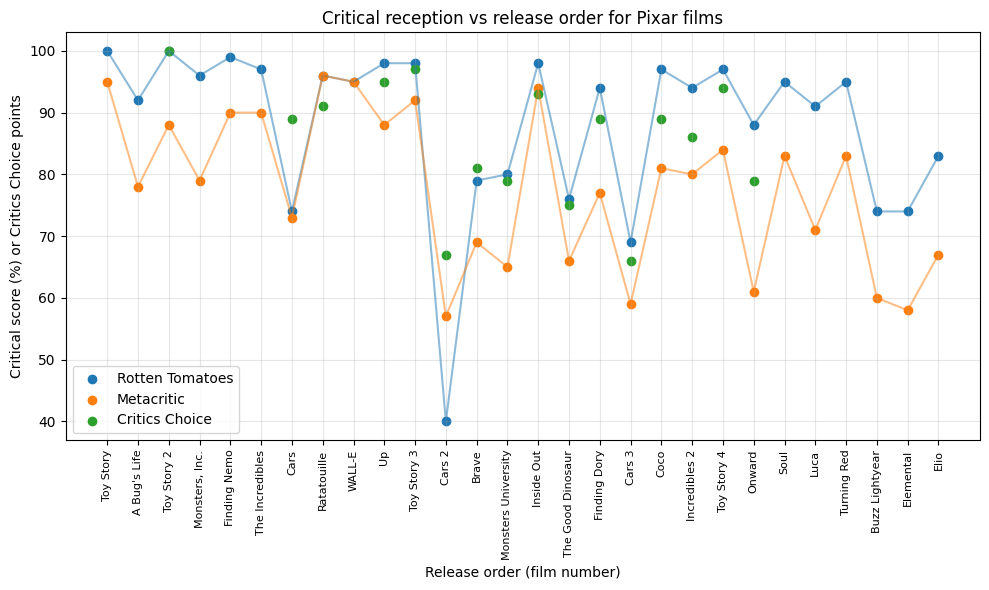

In [15]:
# | label: fig-plot-1
# | fig-cap: "Short explanation"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# --- Step 1: Build a table with the relevant data ---
data = {
    "film": [
        "Toy Story", "A Bug's Life", "Toy Story 2", "Monsters, Inc.",
        "Finding Nemo", "The Incredibles", "Cars", "Ratatouille",
        "WALL-E", "Up", "Toy Story 3", "Cars 2", "Brave", "Monsters University",
        "Inside Out", "The Good Dinosaur", "Finding Dory", "Cars 3",
        "Coco", "Incredibles 2", "Toy Story 4", "Onward", "Soul", "Luca",
        "Turning Red", "Buzz Lightyear", "Elemental", "Elio"
    ],
    "rotten_tomatoes": [
        100, 92, 100, 96,
        99, 97, 74, 96,
        95, 98, 98, 40, 79, 80,
        98, 76, 94, 69,
        97, 94, 97, 88, 95, 91,
        95, 74, 74, 83
    ],
    "metacritic": [
        95, 78, 88, 79,
        90, 90, 73, 96,
        95, 88, 92, 57, 69, 65,
        94, 66, 77, 59,
        81, 80, 84, 61, 83, 71,
        83, 60, 58, 67
    ],
    "cinema_score": [
        None, None, "A+", None,
        None, None, "A", "A",
        "A", "A+", "A", "A-", "A", "B–",
        "A", "B+", "A", "B–",
        "A+", "A+", "A", "A-", None, None,
        None, None, None, "A"
    ],
    "critics_choice": [
        None, None, 100, None,
        None, None, 89, 91,
        None, 95, 97, 67, 81, 79,
        93, 75, 89, 66,
        89, 86, 94, 79, None, None,
        None, None, None, None
    ]
}

df = pd.DataFrame(data)

# Drop rows missing all “cinema_score” and “critics_choice” if you like, or treat missing as NaN
# Convert cinema_score letter grades to a numeric scale (for instance, A+ = 100, A = 95, A- = 90, B+ = 85, etc.)
letter_to_num = {
    "A+": 100,
    "A": 95,
    "A-": 90,
    "B+": 85,
    "B": 80,
    "B-": 75
}
df["cinema_score_num"] = df["cinema_score"].map(letter_to_num)

# Define release order (just the index in this list plus 1)
df["order"] = np.arange(1, len(df) + 1)


# --- Step 2: Plot critical reception & audience reception vs order ---

plt.figure(figsize=(10, 6))

# Plot Rotten Tomatoes
plt.scatter(df["order"], df["rotten_tomatoes"], label="Rotten Tomatoes", c="C0")
# Plot Metacritic
plt.scatter(df["order"], df["metacritic"], label="Metacritic", c="C1")
# Plot Critics Choice (where available)
plt.scatter(df["order"], df["critics_choice"], label="Critics Choice", c="C2")

# Optionally connect the dots
plt.plot(df["order"], df["rotten_tomatoes"], c="C0", alpha=0.5)
plt.plot(df["order"], df["metacritic"], c="C1", alpha=0.5)

plt.xlabel("Release order (film number)")
plt.ylabel("Critical score (%) or Critics Choice points")
plt.title("Critical reception vs release order for Pixar films")
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(df["order"], df["film"], rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

@fig-plot-1 shows a small negative slope. Pixar's later films are still well-reviewed but don't quite match the near-perfect reception of their early masterpieces. Audience scores remain almost unchanged. Thus, Pixar continues to satisfy viewers consistently.